<a href="https://colab.research.google.com/github/angelodilisi/Progetto-Filtro-Fake-News/blob/main/Progetto_Filtro_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importiamo i dataset

In [ ]:
!wget https://proai-datasets.s3.eu-west-3.amazonaws.com/fake_news.zip
!unzip fake_news.zip

--2024-07-02 19:00:56--  https://proai-datasets.s3.eu-west-3.amazonaws.com/fake_news.zip
Resolving proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)... 16.12.18.22, 52.95.154.90
Connecting to proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)|16.12.18.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42975911 (41M) [application/zip]
Saving to: ‘fake_news.zip’

fake_news.zip       100%[===================>]  40.98M  21.5MB/s    in 1.9s    

2024-07-02 19:00:59 (21.5 MB/s) - ‘fake_news.zip’ saved [42975911/42975911]

Archive:  fake_news.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
import pickle
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec


In [ ]:
df_true = pd.read_csv("True.csv")


In [ ]:
df_true

In [ ]:
df_fake = pd.read_csv("Fake.csv")


In [ ]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [ ]:
df_fake['fake'] = 1
df_true['fake'] = 0

df = pd.concat([df_fake, df_true], ignore_index=True)

In [ ]:
df

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [ ]:
import re

def clean_text(text):

    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

df['text'] = df['text'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)

In [ ]:
X = df['text']
y = df['fake']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
model = LinearSVC()
model.fit(X_train_vec, y_train)

LinearSVC()

In [ ]:
accuracy = model.score(X_test_vec, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9959910913140312


In [ ]:
subject_counts = df[df['fake'] == 1]['subject'].value_counts()
print("Fake News più frequenti per categoria:")
print(subject_counts)

Fake News più frequenti per categoria:
subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
doc = df_fake['title'] +' '+ df_fake['text']+' '+df_fake['subject']

In [ ]:
def sent_to_words(items):
    for item in items:
        yield(gensim.utils.simple_preprocess(str(item), deacc=True))

def remove_stopwords(texts):
    return [[word for word in words if word not in stop_words and len(word) >=5] for words in texts]

data_words = list(sent_to_words(doc))
data_words = remove_stopwords(data_words)

In [ ]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

In [ ]:
import gensim
from pprint import pprint
num_topics = 4

lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                      id2word = id2word,
                                      num_topics = num_topics,
                                      passes = 3
                                      )

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"trump" + 0.008*"people" + 0.007*"would" + 0.006*"president" + '
  '0.006*"world" + 0.006*"america" + 0.005*"country" + 0.004*"donald" + '
  '0.004*"american" + 0.004*"obama"'),
 (1,
  '0.031*"trump" + 0.012*"video" + 0.009*"twitter" + 0.009*"hillary" + '
  '0.008*"media" + 0.007*"president" + 0.007*"people" + 0.006*"donald" + '
  '0.006*"clinton" + 0.005*"white"'),
 (2,
  '0.007*"police" + 0.005*"people" + 0.004*"state" + 0.004*"government" + '
  '0.004*"would" + 0.004*"black" + 0.003*"obama" + 0.003*"group" + '
  '0.003*"federal" + 0.003*"court"'),
 (3,
  '0.015*"trump" + 0.013*"clinton" + 0.011*"president" + 0.010*"obama" + '
  '0.007*"hillary" + 0.006*"state" + 0.006*"would" + 0.005*"election" + '
  '0.005*"house" + 0.005*"russia"')]


Tema 0:
Parole chiave: trump, news, video, people, like, media, twitter, left, one, donald
**Possibile interpretazione: Questo tema sembra essere centrato su notizie riguardanti Donald Trump e i social media. Le parole chiave indicano una discussione sui media, i social network (in particolare Twitter), e la figura di Trump.**

Tema 1:
Parole chiave: trump, us, obama, president, would, said, clinton, one, people, states
**Possibile interpretazione: Questo tema appare focalizzato sulla politica americana e i presidenti degli Stati Uniti. Vengono menzionati Trump, Obama e Clinton, indicando discussioni su diverse amministrazioni presidenziali e la politica interna degli Stati Uniti.**


Tema 2:
Parole chiave: clinton, news, media, trump, fbi, hillary, wire, said, russia, russian
**Possibile interpretazione: Questo tema sembra riguardare scandali politici e le indagini dell'FBI, con un focus particolare su Hillary Clinton, Donald Trump e le interferenze russe.**


Tema 3:
Parole chiave: said, police, one, news, people, also, government, year, new, state
**Possibile interpretazione: Questo tema è probabilmente legato a notizie generali e questioni di governo e sicurezza pubblica. Parole come "police", "government" e "state" indicano discussioni su questioni governative e di pubblica sicurezza.**

In [ ]:
title = id2word.doc2bow(simple_preprocess(df_fake['text'][0]))
for index, score in lda_model[title]:
    print("TOPIC: "+str(index))
    print("SCORE:"+str(score))

TOPIC: 0
SCORE:0.37170458
TOPIC: 1
SCORE:0.62500316


In [ ]:
from gensim.corpora import Dictionary


dictionary = Dictionary(df_fake['text'].apply(lambda x: x.split()))
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
corpus_fake = [dictionary.doc2bow(text.split()) for text in df_fake['text']]
topic_distribution = [lda_model.get_document_topics(doc) for doc in corpus_fake]
dominant_topic = [max(topic_dist, key=lambda x: x[1])[0] for topic_dist in topic_distribution]
df_fake['cluster'] = dominant_topic

In [ ]:
topic_names = {
    0: "Notizie riguardanti Donald Trump e i social media",
    1: "Politica americana e i presidenti degli Stati Uniti",
    2: "Scandali politici e le indagini dell'FBI, con un focus particolare su Hillary Clinton, Donald Trump e le interferenze russe",
    3: "Notizie generali e questioni di governo e sicurezza pubblica"
}

In [ ]:
df_fake['topic_name'] = df_fake['cluster'].map(topic_names)

In [ ]:
df_grouped = df_fake.groupby(['subject', 'topic_name']).size().reset_index(name='count')



In [ ]:
df_sorted = df_grouped.sort_values(by=['count'], ascending=[False])
df_sorted

,subject,topic_name,count
9,News,Notizie riguardanti Donald Trump e i social media,4457
21,politics,Notizie riguardanti Donald Trump e i social media,3223
17,left-news,Notizie riguardanti Donald Trump e i social media,2175
8,News,Notizie generali e questioni di governo e sicu...,1820
11,News,"Scandali politici e le indagini dell'FBI, con ...",1715
23,politics,"Scandali politici e le indagini dell'FBI, con ...",1684
19,left-news,"Scandali politici e le indagini dell'FBI, con ...",1104
10,News,Politica americana e i presidenti degli Stati ...,1058
22,politics,Politica americana e i presidenti degli Stati ...,1011
20,politics,Notizie generali e questioni di governo e sicu...,923


Cluster di parole più frequenti per Government News


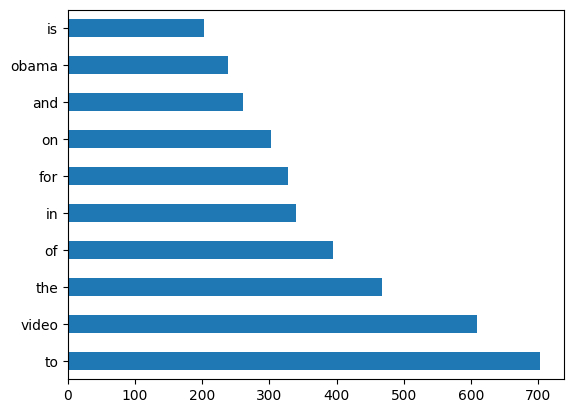

Cluster di parole più frequenti per Middle-east


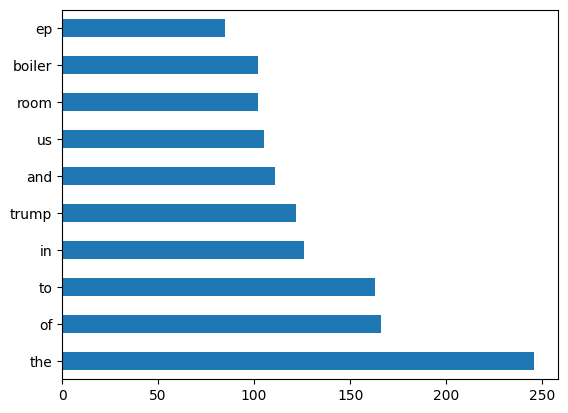

Cluster di parole più frequenti per News


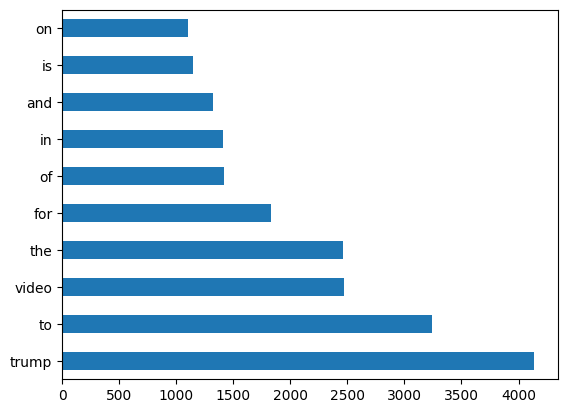

Cluster di parole più frequenti per US_News


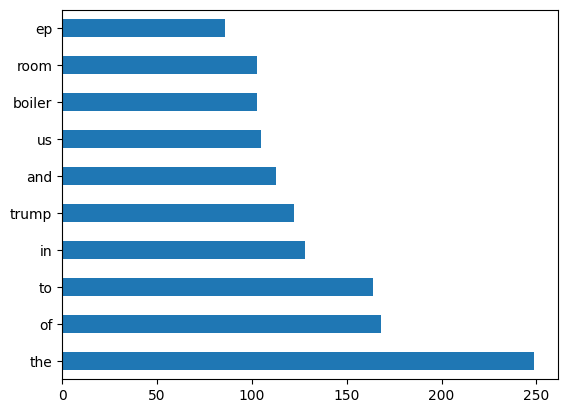

Cluster di parole più frequenti per left-news


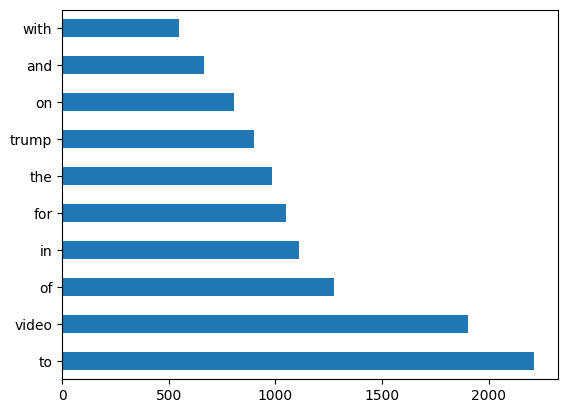

Cluster di parole più frequenti per politics


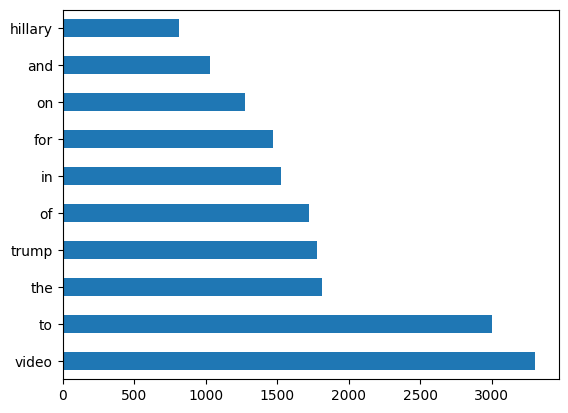

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Raggruppa i testi per categoria
fake_news_by_subject = df[df['fake'] == 1].groupby('subject')['title'].apply(' '.join)

# Vettorizza i dati di testo per ogni categoria
vectorizer = CountVectorizer()
X_fake_vec = vectorizer.fit_transform(fake_news_by_subject)

# Trova le parole più frequenti per categoria
word_freq = pd.DataFrame(X_fake_vec.toarray(), columns=vectorizer.get_feature_names_out())
word_freq.index = fake_news_by_subject.index

# Visualizza i cluster di parole più frequenti per categoria
for subject in word_freq.index:
    print("Cluster di parole più frequenti per", subject)
    word_freq.loc[subject].sort_values(ascending=False).head(10).plot(kind='barh')
    plt.show()